<a href="https://colab.research.google.com/github/Nrnsaaaa/Heart-Disease-Prediction-with-Logistic-Regression/blob/main/Kelompok-K-AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/processed.cleveland.data', header=None)  # dataset

df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

# Tampilkan 5 baris pertama
print(df.head())

# Informasi dataset
print(df.info())

# Statistik deskriptif
print(df.describe())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-n

In [ ]:
# Cek distribusi target awal
print(df['target'].value_counts())

# Konversi target jadi biner
df['hd'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Cek distribusi target baru
print(df['hd'].value_counts())

# Ubah kolom 'sex' jadi kategori dengan label Female/Male
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})

print(df[['sex', 'target', 'hd']].head())


target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
hd
0    164
1    139
Name: count, dtype: int64
      sex  target  hd
0    Male       0   0
1    Male       2   1
2    Male       1   1
3    Male       0   0
4  Female       0   0


In [ ]:
from scipy.stats import chi2_contingency, ttest_ind

# Chi-squared test untuk sex
contingency_table = pd.crosstab(df['sex'], df['hd'])
chi2, p_sex, _, _ = chi2_contingency(contingency_table)

# t-test untuk age
age_disease = df[df['hd'] == 1]['age']
age_no_disease = df[df['hd'] == 0]['age']
t_stat_age, p_age = ttest_ind(age_disease, age_no_disease)

# t-test untuk thalach
thalach_disease = df[df['hd'] == 1]['thalach']
thalach_no_disease = df[df['hd'] == 0]['thalach']
t_stat_thal, p_thal = ttest_ind(thalach_disease, thalach_no_disease)

print(f"p-value Sex: {p_sex}")
print(f"p-value Age: {p_age}")
print(f"p-value Max Heart Rate (thalach): {p_thal}")

print(f"Significant Sex? {'Yes' if p_sex < 0.05 else 'No'}")
print(f"Significant Age? {'Yes' if p_age < 0.05 else 'No'}")
print(f"Significant Max Heart Rate? {'Yes' if p_thal < 0.05 else 'No'}")


p-value Sex: 2.666712348180942e-06
p-value Age: 8.955636917529706e-05
p-value Max Heart Rate (thalach): 3.456964908430172e-14
Significant Sex? Yes
Significant Age? Yes
Significant Max Heart Rate? Yes


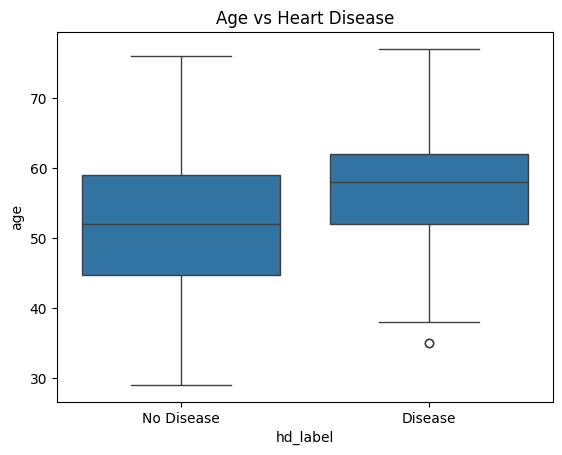

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['hd_label'] = df['hd'].map({0: 'No Disease', 1: 'Disease'})

sns.boxplot(x='hd_label', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()


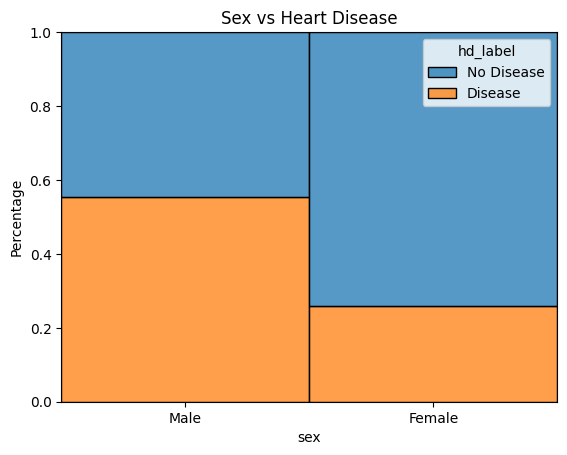

In [ ]:
sns.histplot(data=df, x='sex', hue='hd_label', stat='percent', multiple='fill')
plt.ylabel('Percentage')
plt.title('Sex vs Heart Disease')
plt.show()


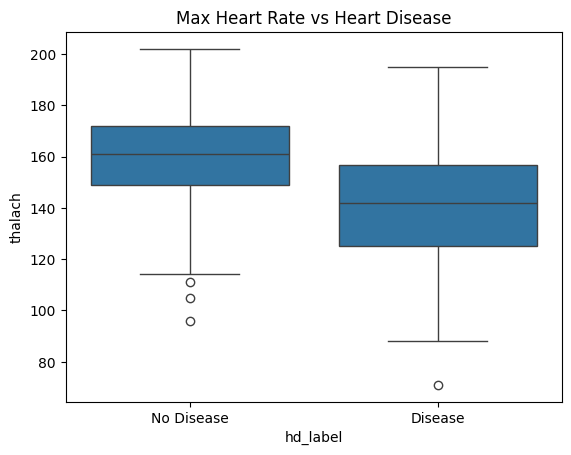

In [ ]:
sns.boxplot(x='hd_label', y='thalach', data=df)
plt.title('Max Heart Rate vs Heart Disease')
plt.show()


In [ ]:
import statsmodels.api as sm
import numpy as np

# Encode sex sebagai binary numeric
df['sex_num'] = df['sex'].map({'Female': 0, 'Male': 1})

X = df[['age', 'sex_num', 'thalach']]
y = df['hd']

X = sm.add_constant(X)  # Tambahkan intercept

model = sm.Logit(y, X).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.549254
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     hd   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 May 2025   Pseudo R-squ.:                  0.2037
Time:                        01:54:03   Log-Likelihood:                -166.42
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.429e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1116      1.607      1.936      0.053      -0.039       6.262
age            0.0319      0.

In [ ]:
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
conf_exp = np.exp(conf)
print(conf_exp)


             2.5%       97.5%         OR
const    0.961782  524.365085  22.457182
age      0.999664    1.066207   1.032400
sex_num  2.434680    8.117231   4.445544
thalach  0.947049    0.973674   0.960269


In [ ]:
df['pred_prob'] = model.predict(X)

df['pred_hd'] = (df['pred_prob'] >= 0.5).astype(int)

print(df[['age', 'sex', 'thalach', 'pred_prob', 'pred_hd']].head())

# Prediksi untuk data baru
new_data = pd.DataFrame({'const':1, 'age':[45], 'sex_num':[0], 'thalach':[150]})
pred_new = model.predict(new_data)
print(f"Predicted probability for 45 y.o Female with max heart rate 150: {pred_new.values[0]}")


    age     sex  thalach  pred_prob  pred_hd
0  63.0    Male    150.0   0.629739        1
1  67.0    Male    108.0   0.913835        1
2  67.0    Male    129.0   0.819063        1
3  37.0    Male    187.0   0.142099        0
4  41.0  Female    172.0   0.072145        0
Predicted probability for 45 y.o Female with max heart rate 150: 0.1773002492232735


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

auc = roc_auc_score(df['hd'], df['pred_hd'])
accuracy = accuracy_score(df['hd'], df['pred_hd'])
cm = confusion_matrix(df['hd'], df['pred_hd'])

print(f"AUC = {auc}")
print(f"Accuracy = {accuracy}")
print("Confusion Matrix:")
print(cm)


AUC = 0.7064835936129145
Accuracy = 0.7095709570957096
Confusion Matrix:
[[122  42]
 [ 46  93]]
